# Import Libraries

In [20]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Load the Apple Dataset

In [44]:
df = pd.read_csv('AAPL.csv')
df.head()

,Date,Open,High,Low,Close,Volume
0,1980-12-12 00:00:00-05:00,0.098834,0.099264,0.098834,0.098834,469033600
1,1980-12-15 00:00:00-05:00,0.094108,0.094108,0.093678,0.093678,175884800
2,1980-12-16 00:00:00-05:00,0.087232,0.087232,0.086802,0.086802,105728000
3,1980-12-17 00:00:00-05:00,0.088951,0.089381,0.088951,0.088951,86441600
4,1980-12-18 00:00:00-05:00,0.091530,0.091959,0.091530,0.091530,73449600


In [37]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11084 entries, 0 to 11083
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Date    11084 non-null  object 
 1   Open    11084 non-null  float64
 2   High    11084 non-null  float64
 3   Low     11084 non-null  float64
 4   Close   11084 non-null  float64
 5   Volume  11084 non-null  int64  
dtypes: float64(4), int64(1), object(1)
memory usage: 519.7+ KB


# EDA

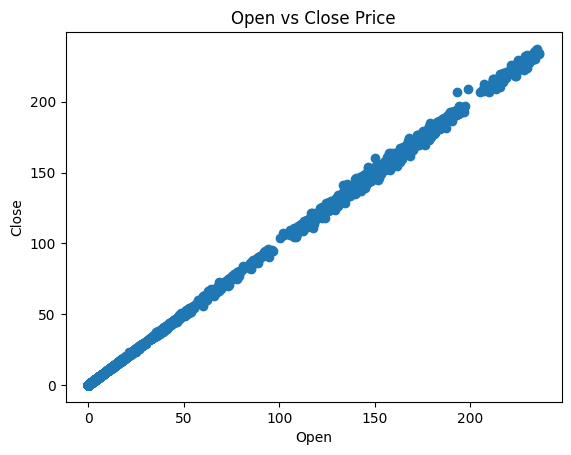

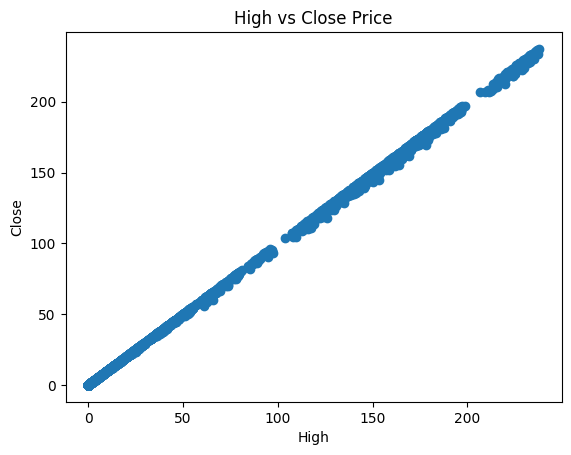

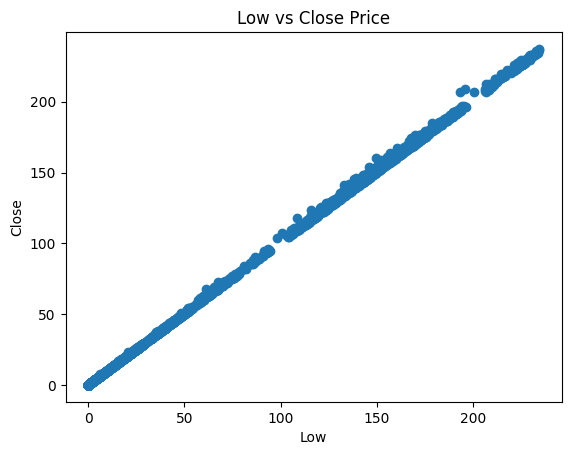

In [23]:
features = ['Open', 'High', 'Low']

for f in features:
    plt.scatter(df[f], df['Close'])
    plt.xlabel(f)
    plt.ylabel('Close')
    plt.title(f"{f} vs Close Price")
    plt.show()

# Feature Selection

In [24]:
x = df[['Open', 'High', 'Low']]  
y = df['Close']                  

# Scaling (Z-score)

# Train/Test Split

In [38]:
x_train, x_test, y_train, y_test = train_test_split(
    x, y, test_size=0.2, random_state=42
)

In [39]:
scaler = StandardScaler()
x_train_scaled = scaler.fit_transform(x_train)
x_test_scaled = scaler.transform(x_test)

# Model Training

In [40]:
model = LinearRegression()
model.fit(x_train_scaled, y_train)

print("Intercept:", model.intercept_)
print("Coefficients:", model.coef_)  # Order: Open, High, Low

Intercept: 23.01780061161893
Coefficients: [-29.15047485  39.24972263  38.59461195]


# Prediction

In [41]:
y_pred = model.predict(x_test_scaled)

# Evaluation (MAE, RMSE, R²)

In [42]:
mae = mean_absolute_error(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
r2 = r2_score(y_test, y_pred)

print("MAE:", mae)
print("RMSE:", rmse)
print("R² Score:", r2)

MAE: 0.1064691364598306
RMSE: 0.317038806164996
R² Score: 0.9999580437742173


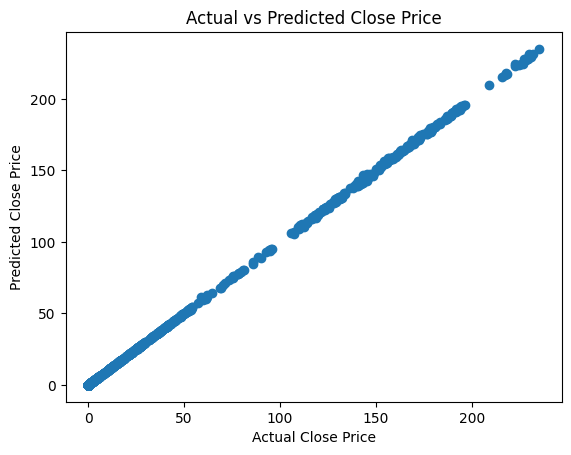

In [43]:
plt.scatter(y_test, y_pred)
plt.xlabel("Actual Close Price")
plt.ylabel("Predicted Close Price")
plt.title("Actual vs Predicted Close Price")
plt.show()
